In [ ]:
import pandas as pd
pandas.set_option('display.max_rows',None)
pandas.set_option('display.max_rows',None)
my_data = pd.read_csv("/content/creditcardfraud.csv")
print(my_data)
print(my_data.describe())
print(my_data.info())


      Time         V1         V2         V3        V4         V5         V6  \
0        0  -1.359807  -0.072781   2.536347  1.378155  -0.338321   0.462388   
1        0   1.191857   0.266151   0.166480  0.448154   0.060018  -0.082361   
2        1  -1.358354  -1.340163   1.773209  0.379780  -0.503198   1.800499   
3        1  -0.966272  -0.185226   1.792993 -0.863291  -0.010309   1.247203   
4        2  -1.158233   0.877737   1.548718  0.403034  -0.407193   0.095921   
5        2  -0.425966   0.960523   1.141109 -0.168252   0.420987  -0.029728   
6        4   1.229658   0.141004   0.045371  1.202613   0.191881   0.272708   
7        7  -0.644269   1.417964   1.074380 -0.492199   0.948934   0.428118   
8        7  -0.894286   0.286157  -0.113192 -0.271526   2.669599   3.721818   
9        9  -0.338262   1.119593   1.044367 -0.222187   0.499361  -0.246761   
10      10   1.449044  -1.176339   0.913860 -1.375667  -1.971383  -0.629152   
11      10   0.384978   0.616109  -0.874300 -0.09401

In [ ]:
x=my_data.iloc[:,:-1].values

In [ ]:
y=my_data.iloc[:,3].values

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(
    rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1
)

# Perform grid search
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Hyperparameters:  {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}
Best Accuracy: 97.33%


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [33]:

pip install --upgrade scikit-learn



SyntaxError: ignored

Best Alpha (Regularization Parameter): 0.0001
Best Negative Mean Squared Error: 2993.0694854722833


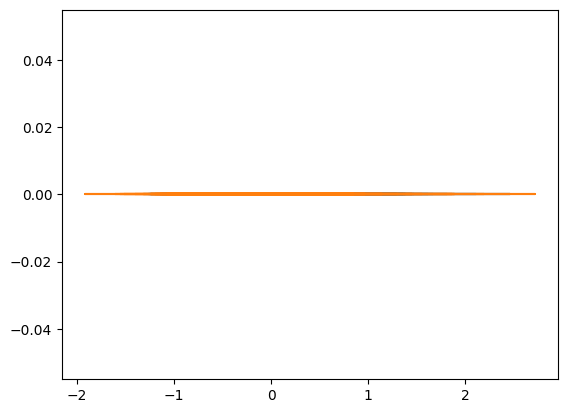

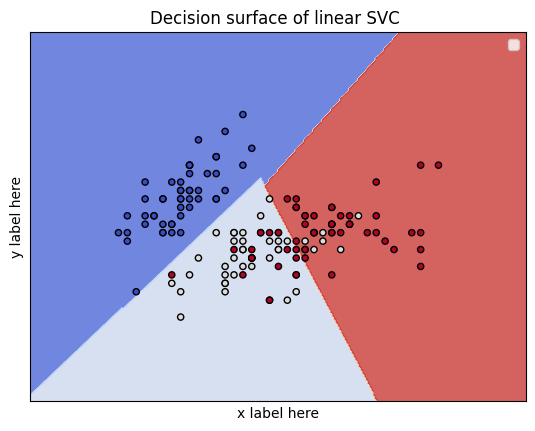

In [54]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
import numpy as np

# Load the diabetes dataset as an example
data = load_diabetes()
X = data.data
y = data.target

# Define the hyperparameter grid to search
param_grid = {
    'alpha': np.logspace(-4, 4, 9)  # Search alpha values from 0.0001 to 10000
}

# Create a Lasso regression model
lasso = Lasso()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X, y)

# Print the best hyperparameters and their corresponding performance
print("Best Alpha (Regularization Parameter):", grid_search.best_params_['alpha'])
print("Best Negative Mean Squared Error:", -grid_search.best_score_)  # Convert negative MSE to positive
# You can also access the best model with the following line
best_lasso_model = grid_search.best_estimator_
# Create a synthetic dataset (2 features, 2 classes)
X, y = make_classification(n_samples=100, n_features=2, random_state=42,n_informative=1, n_redundant=0, n_classes=1)
import matplotlib.pyplot as plt


plt.plot(X,y)

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': [0.001, 0.01, 0.1]     # Kernel coefficient for 'rbf'
}
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


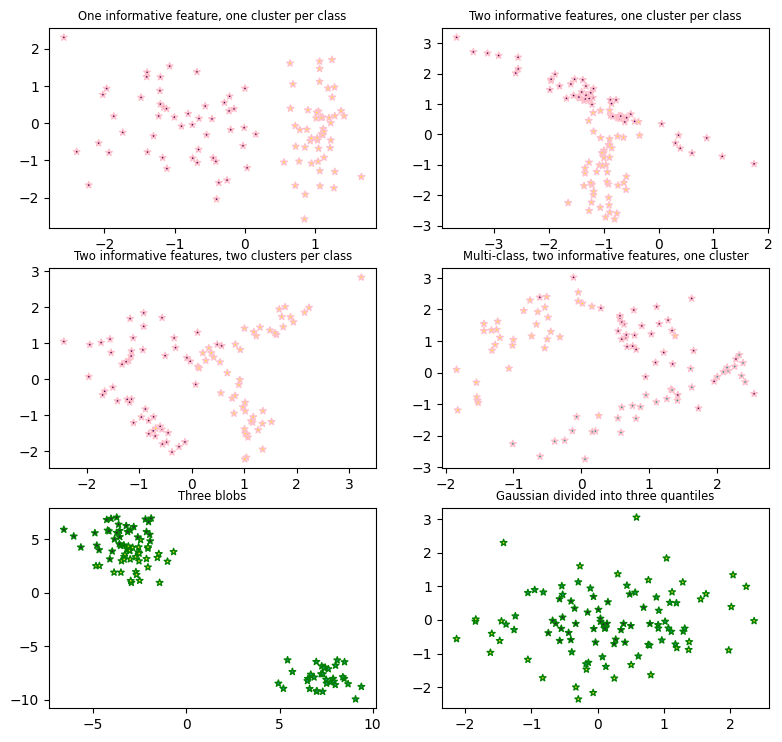

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="*", c=Y1, s=25, edgecolor="pink")

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="*", c=Y1, s=25, edgecolor="pink")

plt.subplot(323)
plt.title("Two informative features, two clusters per class", fontsize="small")
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker="*", c=Y2, s=25, edgecolor="pink")

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3
)
plt.scatter(X1[:, 0], X1[:, 1], marker="*", c=Y1, s=25, edgecolor="pink")

plt.subplot(325)
plt.title("Three blobs", fontsize="small")
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="*", c=Y1, s=25, edgecolor="green")

plt.subplot(326)
plt.title("Gaussian divided into three quantiles", fontsize="small")
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="*", c=Y1, s=25, edgecolor="green")

plt.show()

In [ ]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Function importing Dataset
def importdata():
    balance_data = pd.read_csv("/content/creditcardfraud.csv")

    # Printing the dataswet shape
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)

    # Printing the dataset obseravtions
    print("Dataset: ", balance_data.head())
    return balance_data


# Function to split the dataset
def splitdataset(balance_data):
    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test


# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini


# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred


# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))

    print("Accuracy : ",
          accuracy_score(y_test, y_pred) * 100)

    print("Report : ",
          classification_report(y_test, y_pred))


# Driver code
def main():
    # Building Phase
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

    # Operational Phase
    print("Results Using Gini Index:")

    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)

    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)


# Calling main function
if __name__ == "__main__":
    main()

Dataset Length:  4999
Dataset Shape:  (4999, 31)
Dataset:     Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.1374

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")


data = pd.read_csv("/content/creditcardfraud.csv")
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [ ]:
pd.set_option("display.float", "{:.2f}".format)

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,...,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00
mean,2115.22,-0.23,0.26,0.82,0.02,-0.00,0.18,0.04,-0.03,0.24,...,-0.02,-0.15,-0.04,0.04,0.10,-0.05,0.04,0.00,63.81,0.00
std,1310.10,1.37,1.16,1.01,1.42,1.19,1.37,1.06,1.20,0.98,...,0.80,0.63,0.37,0.62,0.40,0.49,0.33,0.24,197.49,0.02
min,0.00,-12.17,-15.73,-12.39,-4.66,-32.09,-7.47,-11.16,-23.63,-3.34,...,-11.27,-5.71,-8.00,-2.51,-2.32,-1.34,-5.34,-2.91,0.00,0.00
25%,965.50,-0.98,-0.33,0.28,-0.92,-0.60,-0.70,-0.47,-0.19,-0.36,...,-0.24,-0.59,-0.19,-0.34,-0.14,-0.42,-0.04,-0.02,3.80,0.00
50%,2072.00,-0.41,0.33,0.85,0.06,-0.08,-0.17,0.07,0.04,0.23,...,-0.09,-0.17,-0.05,0.10,0.12,-0.09,0.02,0.02,15.16,0.00
75%,3239.50,1.13,0.90,1.46,0.99,0.43,0.58,0.58,0.34,0.76,...,0.07,0.28,0.09,0.45,0.36,0.25,0.17,0.08,57.17,0.00
max,4562.00,1.69,6.22,4.10,6.01,10.66,21.39,34.30,3.88,9.27,...,15.63,4.39,4.10,3.20,1.97,3.46,3.85,4.16,7712.43,1.00


In [ ]:
data.isnull().sum().sum()

0

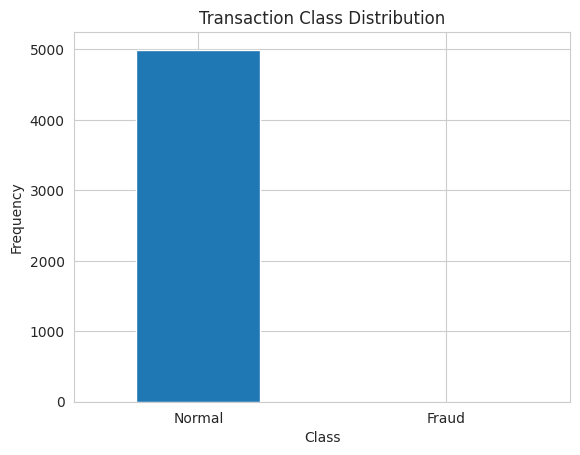

In [ ]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
data.Class.value_counts()

0    4996
1       3
Name: Class, dtype: int64

In [ ]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (3, 31)
Shape of Non-Fraudulant transactions: (4996, 31)


In [ ]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,3.00,4996.00
mean,256.31,63.70
std,264.88,197.42
min,0.00,0.00
25%,119.97,3.80
50%,239.93,15.16
75%,384.47,57.04
max,529.00,7712.43


<ipython-input-13-4413f71fb891>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Time'], color='green');
<ipython-input-13-4413f71fb891>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Amount'],color='yellow');


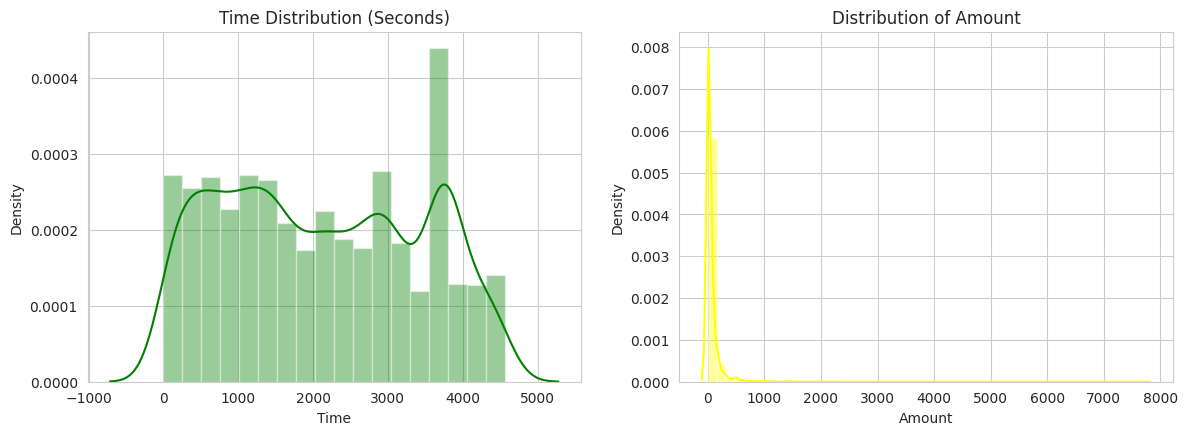

In [ ]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.distplot(data['Time'], color='green');

# plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='yellow');

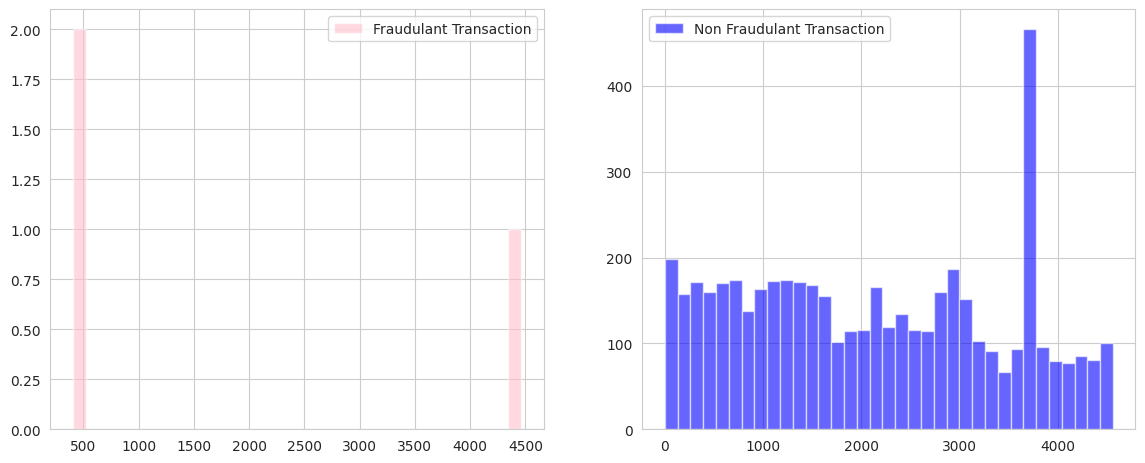

In [ ]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(
  bins=35, color='pink', alpha=0.6, label="Fraudulant Transaction"
)
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(
  bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction"
)
plt.legend()

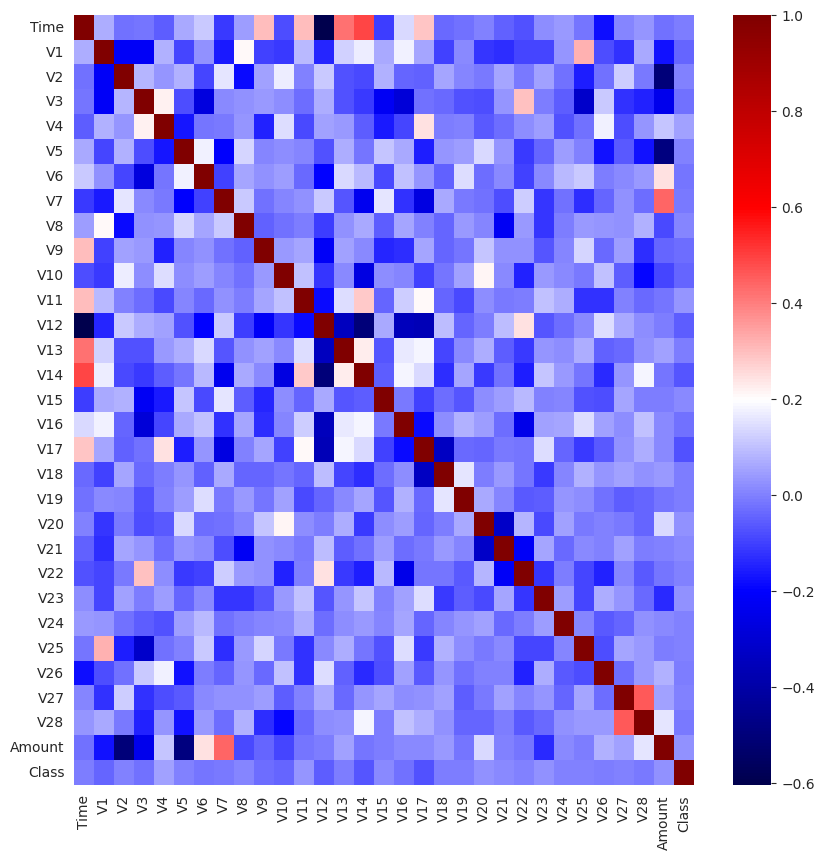

In [ ]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y,
                                       test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v,
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0007145409074669524
Non-Fraudulant transaction weight: 0.9992854590925331


In [ ]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (2799, 30), y_train: (2799,)
_______________________________________________________
VALIDATION: X_validate: (700, 30), y_validate: (700,)
__________________________________________________
TESTING: X_test: (1500, 30), y_test: (1500,)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train,
    validation_data=(X_validate, y_validate),
    batch_size=2048,
    epochs=300,
#     class_weight=class_weight,
    callbacks=callbacks,
)
score = model.evaluate(X_test, y_test)
print(score)

Epoch 1/300
2/2 [==============================] - 8s 1s/step - loss: 0.9461 - fn: 2.0000 - fp: 1445.0000 - tn: 1352.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6075 - val_fn: 1.0000 - val_fp: 49.0000 - val_tn: 650.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
1/2 [==============>...............] - ETA: 0s - loss: 0.9318 - fn: 2.0000 - fp: 1052.0000 - tn: 994.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 115ms/step - loss: 0.9283 - fn: 2.0000 - fp: 1452.0000 - tn: 1345.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6188 - val_fn: 1.0000 - val_fp: 70.0000 - val_tn: 629.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/300
2/2 [==============================] - 0s 108ms/step - loss: 0.9226 - fn: 2.0000 - fp: 1423.0000 - tn: 1374.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6299 - val_fn: 0.0000e+00 - val_fp: 90.0000 - val_tn: 609.0000 - val_tp: 1.0000 - val_precision: 0.0110 - val_recall: 1.0000
Epoch 4/300
2/2 [==============================] - 0s 103ms/step - loss: 0.9092 - fn: 2.0000 - fp: 1440.0000 - tn: 1357.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6394 - val_fn: 0.0000e+00 - val_fp: 120.0000 - val_tn: 579.0000 - val_tp: 1.0000 - val_precision: 0.0083 - val_recall: 1.0000
Epoch 5/300
2/2 [========

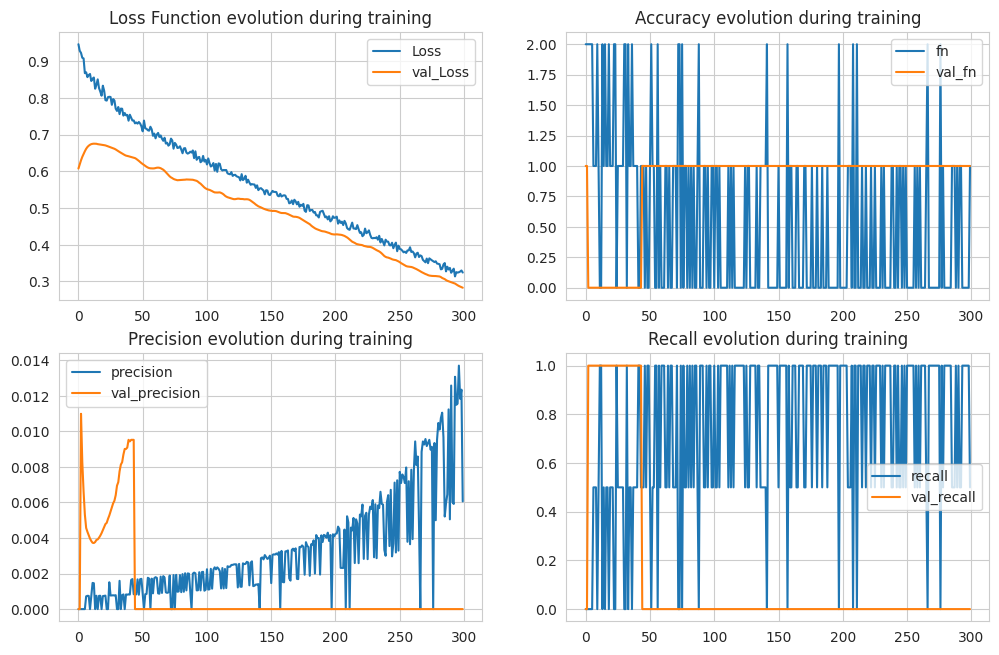

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

47/47 [==============================] - 0s 2ms/step
Train Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                0    1  accuracy  macro avg  weighted avg
precision    1.00 0.67      1.00       0.83          1.00
recall       1.00 1.00      1.00       1.00          1.00
f1-score     1.00 0.80      1.00       0.90          1.00
support   2797.00 2.00      1.00    2799.00       2799.00
_______________________________________________
Confusion Matrix: 
 [[2796    1]
 [   0    2]]

Test Result:
Accuracy Score: 99.93%
_______________________________________________
Classification Report:
              0.0  1.0  accuracy  macro avg  weighted avg
precision    1.00 0.00      1.00       0.50          1.00
recall       1.00 0.00      1.00       0.50          1.00
f1-score     1.00 0.00      1.00       0.50          1.00
support   1500.00 0.00      1.00    1500.00       1500.00
_______________________________________________
Confusio

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.93%
_______________________________________________
Classification Report:
                0    1  accuracy  macro avg  weighted avg
precision    1.00 0.00      1.00       0.50          1.00
recall       1.00 0.00      1.00       0.50          1.00
f1-score     1.00 0.00      1.00       0.50          1.00
support   2797.00 2.00      1.00    2799.00       2799.00
_______________________________________________
Confusion Matrix: 
 [[2797    0]
 [   2    0]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                0  accuracy  macro avg  weighted avg
precision    1.00      1.00       1.00          1.00
recall       1.00      1.00       1.00          1.00
f1-score     1.00      1.00       1.00          1.00
support   1500.00      1.00    1500.00       1500.00
_______________________________________________
Confusion Matrix: 
 [[1500]]



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-de

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Learning rate set to 0.015988
0:	learn: 0.6509513	total: 185ms	remaining: 3m 4s
1:	learn: 0.6116274	total: 222ms	remaining: 1m 50s
2:	learn: 0.5744741	total: 243ms	remaining: 1m 20s
3:	learn: 0.5406667	total: 269ms	remaining: 1m 6s
4:	learn: 0.5092576	total: 290ms	remaining: 57.7s
5:	learn: 0.4743616	total: 335ms	remaining: 55.6s
6:	learn: 0.4455368	total: 373ms	remaining: 53s
7:	learn: 0.4166679	total: 421ms	remaining: 52.2s
8:	learn: 0.3867740	total: 448ms	remaining: 49.4s
9:	learn: 0.3626654	total: 472ms	remaining: 46.7s
10:	learn: 0.3409580	total: 497ms	remaining: 44.7s
11:	learn: 0.3170288	total: 536ms	remaining: 44.2s
12:	learn: 0.2986664	total: 565ms	remaining: 42.9s
13:	learn: 0.2806424	total: 600ms	remaining: 42.2s
14:	learn: 0.2633763	total: 630ms	remaining: 41.3s
15:	learn: 0.2451905	total: 663ms	remaining: 40.8s
16:	learn: 0.2270235	total: 696ms	remaining: 40.2s
17:	learn: 0.2135946	total: 727ms	remaining: 39.6s
18:	learn: 0.2010803	total: 751ms	remaining: 38.8s
19:	learn: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


<Axes: >

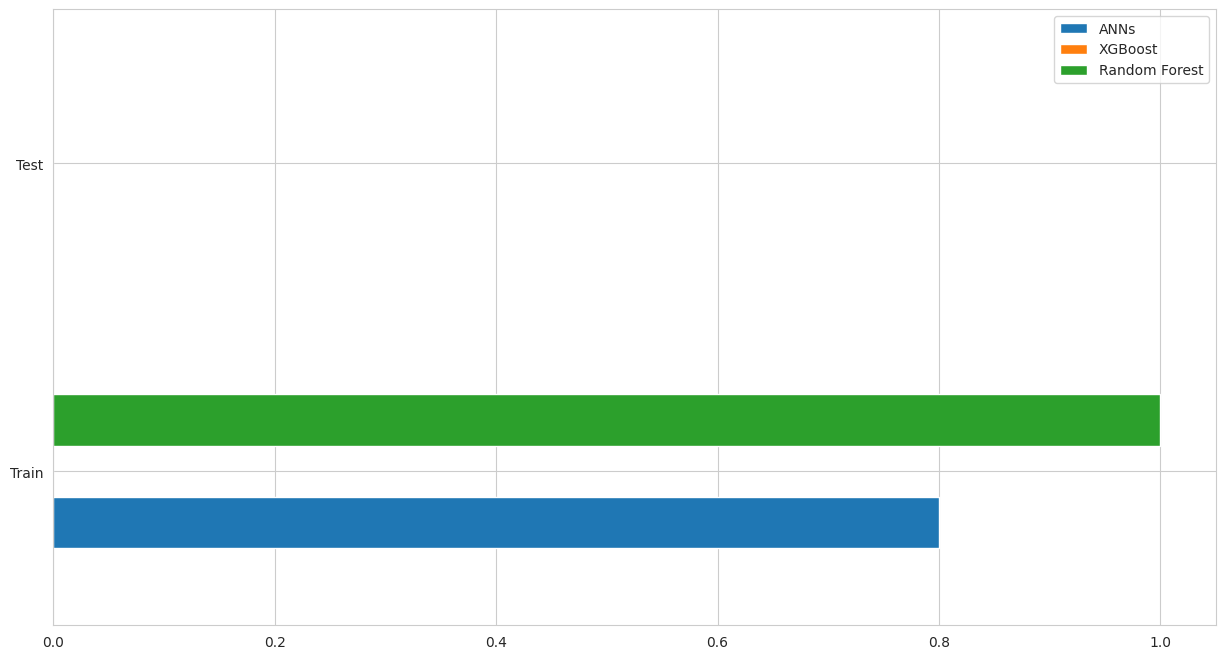

In [ ]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

        Exam1      Exam2  Admitted
0   54.881350  67.781654         0
1   71.518937  27.000797         1
2   60.276338  73.519402         0
3   54.488318  96.218855         0
4   42.365480  24.875314         1
..        ...        ...       ...
95  18.319136  49.045881         0
96  58.651293  22.741463         1
97   2.010755  25.435648         0
98  82.894003   5.802916         1
99   0.469548  43.441663         0

[100 rows x 3 columns]
        Exam1      Exam2
0   54.881350  67.781654
1   71.518937  27.000797
2   60.276338  73.519402
3   54.488318  96.218855
4   42.365480  24.875314
..        ...        ...
95  18.319136  49.045881
96  58.651293  22.741463
97   2.010755  25.435648
98  82.894003   5.802916
99   0.469548  43.441663

[100 rows x 2 columns]
0     0
1     1
2     0
3     0
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: Admitted, Length: 100, dtype: int64
------------------
[1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1]
Accuracy: 0.45
              precision   

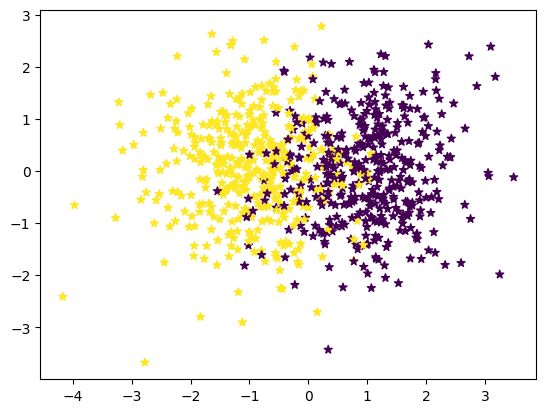

Actual Value: 1
Predicted Value: 1
Accuracy: 0.8977272727272727
F1 Score: 0.8976082740788625
[[114   9   0]
 [ 18 123   0]
 [  0   0   0]]


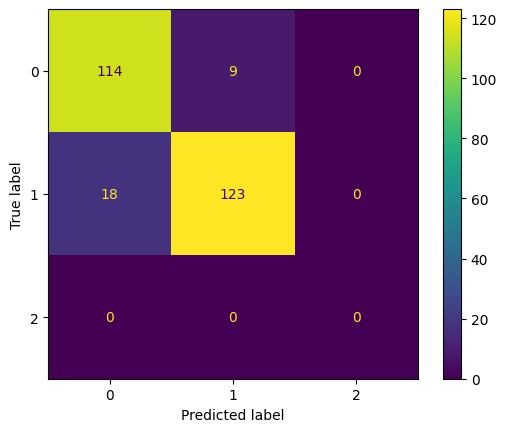

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate some sample data
np.random.seed(0)
data = {
    'Exam1': np.random.rand(100) * 100,
    'Exam2': np.random.rand(100) * 100,
    'Admitted': np.random.randint(2, size=100)
}
df = pd.DataFrame(data)
print(df)
#
# # Split the data into features (X) and target (y)
X = df[['Exam1', 'Exam2']]
y = df['Admitted']
print(X)
print(y)
#
# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # Create a logistic regression model
model = LogisticRegression()
#
# # Fit the model to the training data
model.fit(X_train, y_train)
#
# # Make predictions on the test data
y_pred = model.predict(X_test)
print("------------------")
print(y_pred)
#
# # Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
#
# # Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#
# Plot the decision boundary
# x_min, x_max = X['Exam1'].min() - 10, X['Exam1'].max() + 10
# y_min, y_max = X['Exam2'].min() - 10, X['Exam2'].max() + 10
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
#
# plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
# plt.scatter(X['Exam1'], X['Exam2'], c=y, cmap=plt.cm.RdBu)
# plt.xlabel('Exam 1 Score')
# plt.ylabel('Exam 2 Score')
# plt.title('Logistic Regression Decision Boundary')
# plt.show()
#Output:


#scikit-learn
from sklearn.datasets import make_classification

value1, y = make_classification(
    n_features=6,
    n_classes=2,
    n_samples=800,
    n_informative=2,
    random_state=66,
    n_clusters_per_class=1,
)

##. This code imports the make_classification function from the sklearn.datasets module.
##• The make_classification function generates a random dataset for classification tasks.
##• The function takes several arguments: n_features: the number of features (or independent variables) in the dataset.
##• In this case, there are 6 features.
##• n_classes: the number of classes (or target variables) in the dataset.
##• In this case, there are 3 classes.
##• n_samples: the number of samples (or observations) in the dataset.
##• In this case, there are 800 samples.
##• n_informative: the number of informative features in the dataset.
##• These are the features that actually influence the target variable.
##• In this case, there are 2 informative features.
##• random_state: a seed value for the random number generator.
##• This ensures that the dataset is reproducible.
##• n_clusters_per_class: the number of clusters per class.
##• This determines the degree of separation between the classes.
##• In this case, there is only 1 cluster per class.
##• The function returns two arrays: X: an array of shape (n_samples, n_features) containing the features of the dataset.
##• y: an array of shape (n_samples,) containing the target variable of the dataset.

import matplotlib.pyplot as plt

plt.scatter(value1[:, 0], value1[:, 1], c=y, marker="*")
plt.show()

##This code imports the matplotlib.pyplot module and creates a scatter plot using the scatter() function.
##• The X and y variables are assumed to be previously defined arrays or data frames.
##• The scatter() function takes three arguments: X[:, 0] and X[:, 1] are the first and second columns of the X array, respectively, and c=y assigns a color to each point based on the corresponding value in the y array.
##• The marker argument specifies the shape of the marker used for each point, in this case, an asterisk.
##• The resulting plot will have the values in the first column of X on the x-axis, the values in the second column of X on the y-axis, and each point will be colored based on the corresponding value in y.


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    value1, y, test_size=0.33, random_state=125
)

##This code imports the train_test_split function from the sklearn.model_selection module.
##• This function is used to split the dataset into training and testing sets.
##• The train_test_split function takes four arguments: X, y, test_size, and random_state.
##• X and y are the input features and target variable, respectively.
##• test_size is the proportion of the dataset that should be allocated to the testing set.
##• In this case, it is set to 0.33, which means that 33% of the data will be used for testing.
##• random_state is used to set the seed for the random number generator, which ensures that the same random split is generated each time the code is run.
##• The function returns four variables: X_train, X_test, y_train, and y_test.
##• X_train and y_train are the training set, while X_test and y_test are the testing set.
##• These variables can be used to train and evaluate a machine learning model.

from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])
#
print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])


##This code uses the scikit-learn library to build a Gaussian Naive Bayes classifier.
##• First, the code imports the GaussianNB class from the sklearn.naive_bayes module.
##• Next, a new instance of the GaussianNB class is created and assigned to the variable 'model'.
##• The model is then trained using the fit() method, which takes in the training data X_train and the corresponding target values y_train.
##• After the model is trained, it is used to predict the output for a single test data point, which is the 7th element in the X_test array.
##• The predicted value is stored in the 'predicted' variable.
##• Finally, the actual value for the test data point is printed using y_test[6], and the predicted value is printed using predicted[0].

#---------------

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

##This code imports several functions from the sklearn.metrics module, including accuracy_score, confusion_matrix, ConfusionMatrixDisplay, and f1_score.
##• These functions are used to evaluate the performance of a machine learning model.
##• The code then uses the model.predict method to generate predictions for the test data (X_test).
##• These predictions are compared to the actual labels (y_test) using the accuracy_score and f1_score functions.
##• The accuracy_score function calculates the accuracy of the model's predictions,
## while the f1_score function calculates the F1 score, which is a weighted average of precision and recall.
##• Finally, the code prints out the accuracy and F1 score of the model's predictions.

#-----------------------------

#####Expected output
####
####Accuracy: 0.8484848484848485
####F1 Score: 0.8491119695890328

####This code snippet is not actually a code, but rather the output of some code that was run.
####• It shows the accuracy and F1 score of a model that was trained on some data.
####• The accuracy is 0.8484848484848485,
## which means that the model correctly predicted the outcome of 84.8% of the cases.
####• The F1 score is 0.8491119695890328,
#### which is a measure of the model's accuracy that takes into account both precision and recall.
####• A higher F1 score indicates better performance of the model.

#------------------------------------------------

labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

########This code is using the scikit-learn library to create a confusion matrix and display it using ConfusionMatrixDisplay.
########• First, a list of labels is created with the values 0, 1, and 2.
########• Then, the confusion_matrix function is called with the test labels (y_test) and predicted labels (y_pred) as inputs, along with the labels list.
########• This creates a confusion matrix with the specified labels.
########• Next, a ConfusionMatrixDisplay object is created with the confusion matrix as input, along with the labels list.
########• Finally, the plot method is called on the display object to show the confusion matrix graphically.


<Axes: xlabel='Time', ylabel='Amount'>

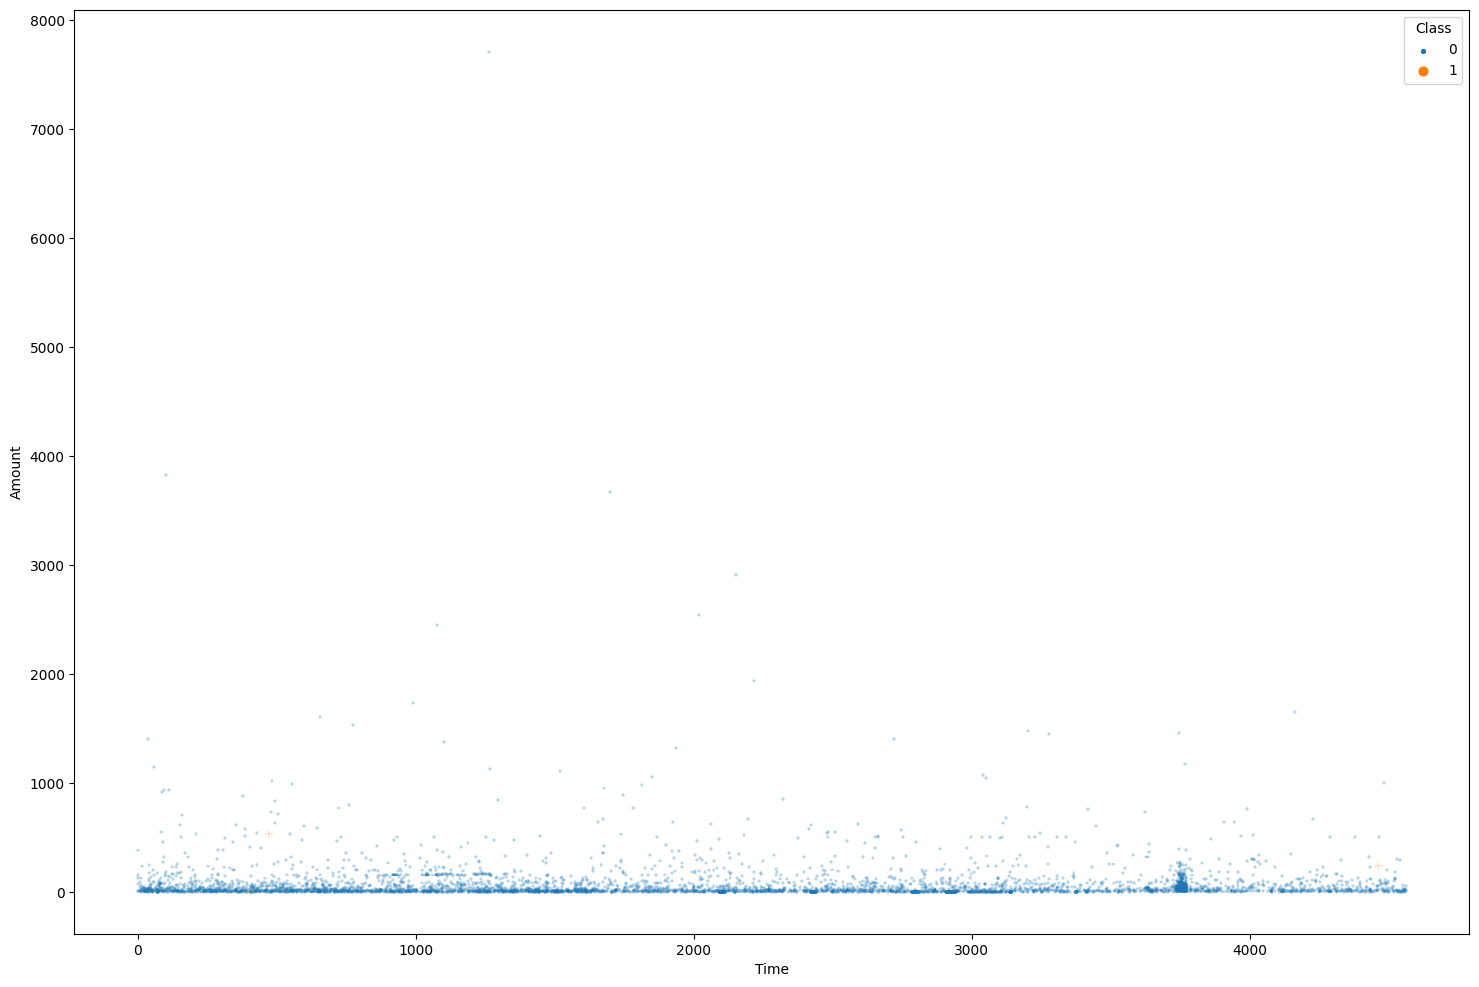

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_rows',None)
my_data = pd.read_csv("/content/creditcardfraud.csv")
warnings.filterwarnings("ignore")
plt.figure(figsize=(18,12))
sns.scatterplot(x=my_data["Time"], y=my_data["Amount"], hue=my_data["Class"], size=my_data["Class"], sizes=(40, 8), marker="+")